# Assignment 2   -- Group 14

In [1]:
import pandas as pd
import statsmodels.api as sm
import math 
import statistics as st
import numpy as np

## Preprocess data

In [2]:
return_df = pd.read_excel(r"C:\Users\51528\Desktop\Big Data in Finance\Assignment2\Returns_Clean.xlsx")
flow_df = pd.read_excel(r"C:\Users\51528\Desktop\Big Data in Finance\Assignment2\Flows_Clean.xlsx")

In [3]:
flow_df.head()

,Dates,50286,91804,10401,58501,60097,10363,41726,25080,30402,...,65365,27748,19350,75823,22840,17750,64557,50278,15553,88832
0,19930401,1.083253,-5.699942,1.194241,4.837066,-8.423100,-1.305991,1.299232,-0.467033,0.000000,...,0.416478,0.904076,3.731669,-0.774561,-0.257508,3.162328,-0.047864,0.623058,0.329819,0.232555
1,19930402,1.420868,8.951401,-1.106500,4.365623,-11.960179,1.261436,0.145421,0.625825,-2.529088,...,7.658829,0.394204,4.965978,-1.697999,-5.026532,-5.289657,2.423657,-10.043329,4.213098,-0.854005
2,19930405,-1.720117,-5.216893,-1.388985,0.516303,-16.809023,0.610771,-3.277465,0.595360,1.170176,...,0.340133,-1.597132,0.226364,-1.705865,-3.205529,-1.523400,0.293756,-1.155403,-0.594859,1.080668
3,19930406,-19.184283,-0.998393,0.645662,3.255778,-16.809023,1.372598,-0.205378,0.373627,0.531704,...,2.533133,-1.129123,-0.336779,-2.188710,-2.068314,2.333132,-1.148651,2.912813,0.501317,0.360467
4,19930407,-1.772440,-8.526801,2.737920,6.905926,-14.449892,0.101245,24.657138,0.046703,0.558868,...,-0.114119,-1.221991,6.340711,-0.011839,-6.358787,-2.466997,-0.485223,1.524124,0.556544,0.623206


In [4]:
return_df.columns = return_df.columns.astype(str)
flow_df.columns = flow_df.columns.astype(str)
tickers = return_df.columns[1:]
return_df.columns = ["Dates"] + [i+" return" for i in return_df.columns[1:]]
flow_df.columns = ["Dates"] + [i+" flow" for i in flow_df.columns[1:]]

In [5]:
print(return_df.columns)
print(flow_df.columns)

Index(['Dates', '50286 return', '91804 return', '10401 return', '58501 return',
       '60097 return', '10363 return', '41726 return', '25080 return',
       '30402 return',
       ...
       '65365 return', '27748 return', '19350 return', '75823 return',
       '22840 return', '17750 return', '64557 return', '50278 return',
       '15553 return', '88832 return'],
      dtype='object', length=101)
Index(['Dates', '50286 flow', '91804 flow', '10401 flow', '58501 flow',
       '60097 flow', '10363 flow', '41726 flow', '25080 flow', '30402 flow',
       ...
       '65365 flow', '27748 flow', '19350 flow', '75823 flow', '22840 flow',
       '17750 flow', '64557 flow', '50278 flow', '15553 flow', '88832 flow'],
      dtype='object', length=101)


In [5]:
df = pd.merge(return_df,flow_df)
merge_data = df
merge_data.head()

,Dates,50286 return,91804 return,10401 return,58501 return,60097 return,10363 return,41726 return,25080 return,30402 return,...,65365 flow,27748 flow,19350 flow,75823 flow,22840 flow,17750 flow,64557 flow,50278 flow,15553 flow,88832 flow
0,19930401,0.004219,0.000000,0.004405,-0.041667,-0.052980,-0.010000,0.007092,0.000000,-0.009709,...,0.416478,0.904076,3.731669,-0.774561,-0.257508,3.162328,-0.047864,0.623058,0.329819,0.232555
1,19930402,-0.021008,-0.093023,-0.006579,0.021739,-0.050490,-0.050505,0.000000,0.100000,0.000000,...,7.658829,0.394204,4.965978,-1.697999,-5.026532,-5.289657,2.423657,-10.043329,4.213098,-0.854005
2,19930405,0.021459,0.025641,-0.008830,0.000000,-0.022140,-0.021277,-0.007042,-0.181818,-0.019608,...,0.340133,-1.597132,0.226364,-1.705865,-3.205529,-1.523400,0.293756,-1.155403,-0.594859,1.080668
3,19930406,-0.021008,-0.025000,0.022272,-0.042553,-0.052830,-0.021739,0.000000,0.111111,-0.010000,...,2.533133,-1.129123,-0.336779,-2.188710,-2.068314,2.333132,-1.148651,2.912813,0.501317,0.360467
4,19930407,0.008584,-0.025641,0.010893,0.000000,-0.043825,0.011111,0.000000,-0.100000,0.010101,...,-0.114119,-1.221991,6.340711,-0.011839,-6.358787,-2.466997,-0.485223,1.524124,0.556544,0.623206


In [6]:
from dateutil.parser import parse
merge_data['Dates'] = pd.to_datetime(merge_data['Dates'].astype(str), format='%Y%m%d')
merge_data.tail()

,Dates,50286 return,91804 return,10401 return,58501 return,60097 return,10363 return,41726 return,25080 return,30402 return,...,65365 flow,27748 flow,19350 flow,75823 flow,22840 flow,17750 flow,64557 flow,50278 flow,15553 flow,88832 flow
1953,2000-12-22,0.042222,0.007353,0.043956,0.107692,0.049661,-0.050000,0.016051,0.025641,0.056338,...,-0.199335,0.115186,4.684013,-5.628148,1.021970,1.393392,-0.800745,-4.050510,-1.284210,-10.919585
1954,2000-12-26,-0.027719,0.040146,-0.010526,-0.083333,0.015054,0.000000,0.012638,0.025000,-0.060000,...,-0.176388,0.226673,1.901100,1.398325,2.634517,-0.021672,1.040802,-11.314789,0.867471,3.441675
1955,2000-12-27,0.024123,0.035088,-0.029787,-0.045455,0.033898,0.052632,0.073323,0.042683,0.063830,...,0.646028,-0.120893,2.032607,-5.510283,1.174721,0.770395,2.726246,-9.453309,-1.914385,-4.199699
1956,2000-12-28,0.049251,0.071186,-0.007326,-0.015873,0.000000,-0.050000,0.015988,0.000000,-0.020000,...,-6.532637,-0.133281,-0.145316,10.869903,6.412388,0.549168,8.232319,-7.484915,-1.920007,7.565088
1957,2000-12-29,-0.026531,-0.066456,0.018450,0.112903,-0.010246,0.105263,-0.027182,0.017544,0.088435,...,-1.438236,1.087321,-1.743204,3.688079,2.898397,0.752422,-6.696065,12.817672,0.858047,-5.529854


In [7]:
df = merge_data

## Linear Regression

In [8]:
def ols(ticker, window):
    l1ri = df[ticker+" return"].shift(1)
    l2ri = df[ticker+" return"].shift(2)
    l3ri = df[ticker+" return"].shift(3)
    l1fi = df[ticker+" flow"].shift(1)
    l2fi = df[ticker+" flow"].shift(2)
    l3fi = df[ticker+" flow"].shift(3)
    y = df[ticker+" return"]
    data = pd.DataFrame({"Dates":df["Dates"],"y":y,"r1":l1ri,"r2":l2ri,"r3":l3ri,"f1":l1fi,"f2":l2fi,"f3":l3fi}).dropna()
    variables=[x for x in data.columns if 'r' in x or 'f' in x]
    size = len(data)
    pred = []
    se = []
    test = []
    crmse = []
    # Rolling windows
    for i in range(size-window-1):
        train_y = data["y"][i:i+window+1]
        test_y = data["y"][i+window+1:i+window+2].values[0]
        train_X = data[variables][i:i+window+1]
        test_X = data[variables][i+window+1:i+window+2]
        model = sm.OLS(train_y,train_X)
        res = model.fit()
        predi = res.predict(test_X).values[0]
        sei = (test_y-predi)**2
        pred.append(predi)
        se.append(sei)
        test.append(test_y)
    r_squared = 1-(sum(se)/(st.variance(test)*len(test)))
    return se, pred, r_squared

In [9]:
print(ols("50286", 50)[2])

-0.1563730938989225


## Historical Mean

In [10]:
def hm(ticker, window):
    pred = df[ticker + " return"].rolling(window).mean()[window+4:].values
    real = df[ticker + " return"][window+4:].values 
    se = (pred-real)**2
    rmse = math.sqrt(sum(se)/len(se))
    r_squared = 1-(sum(se)/(st.variance(real)*len(real)))
    return rmse, pred, r_squared
    

In [11]:
print(ols("50286", 200)[2])
print("-----------------------")
print(hm("50286", 200)[2])

-0.019423130697571178
-----------------------
0.005189500749988918


## Plot cumulative RMSE for OLS with different window size

In [15]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))

#Window size
for i in tqdm([30,60,90,120,150,180,210]):
    cum_rmse1=[]
    crmse1=0
    for ticker in tickers:
        crmse1+=ols(ticker, i)[0]
        cum_rmse1.append(crmse1) 
    ax.plot(range(len(tickers)), cum_rmse1, label="w = "+str(i))
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE for OLS')
ax.set_xlabel('Number of stocks')
plt.show()

<Figure size 1000x800 with 1 Axes>

## Plot cumulative RMSE for historical means with different window size

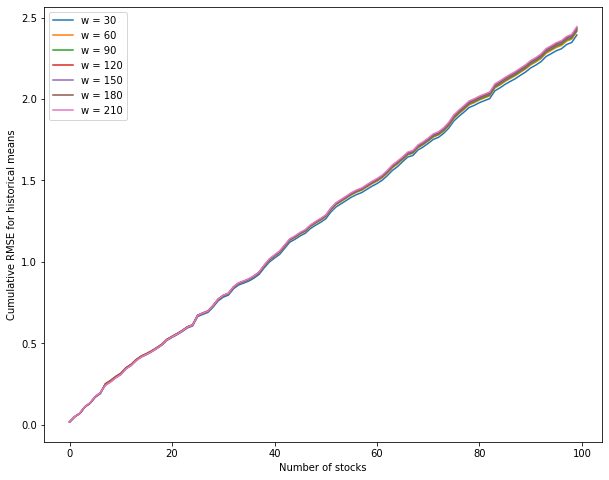

In [57]:
from tqdm.notebook import tqdm
fig, ax = plt.subplots(figsize=(10,8))
for i in tqdm([30,60,90,120,150,180,210]):
    cum_rmse2=[]
    crmse2=0
    for ticker in tickers:
        crmse2+=hm(ticker, i)[0]
        cum_rmse2.append(crmse2) 
    ax.plot(range(len(tickers)), cum_rmse2, label="w = "+str(i))
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE for historical means')
ax.set_xlabel('Number of stocks')
plt.show()

## Choose window size = 210 :

In [58]:
from tqdm.notebook import tqdm
cum_rmse1=[]
cum_rmse2=[]
crmse1=0
crmse2=0
for ticker in tqdm(tickers):
    crmse1+=ols(ticker,210)[0]
    cum_rmse1.append(crmse1) 
    crmse2+=hm(ticker,210)[0]
    cum_rmse2.append(crmse2) 

## Plot cumulative RMSE differential

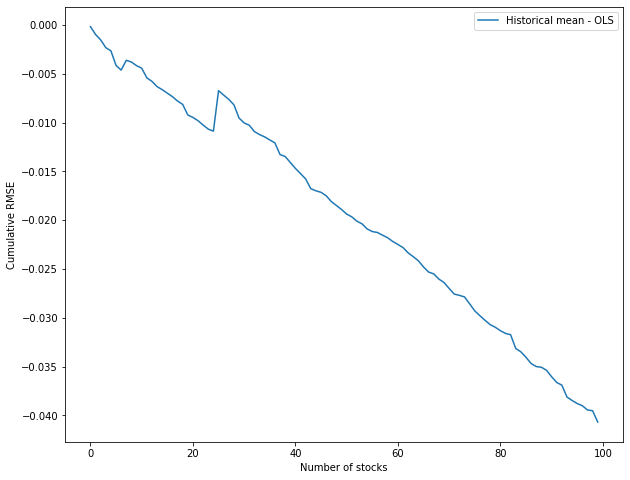

In [59]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(range(len(tickers)), np.subtract(cum_rmse2, cum_rmse1), label="Historical mean - OLS")
ax.legend(loc = 'best')
ax.set_ylabel('Cumulative RMSE')
ax.set_xlabel('Number of stocks')
plt.show()

## Out of sample R-squared

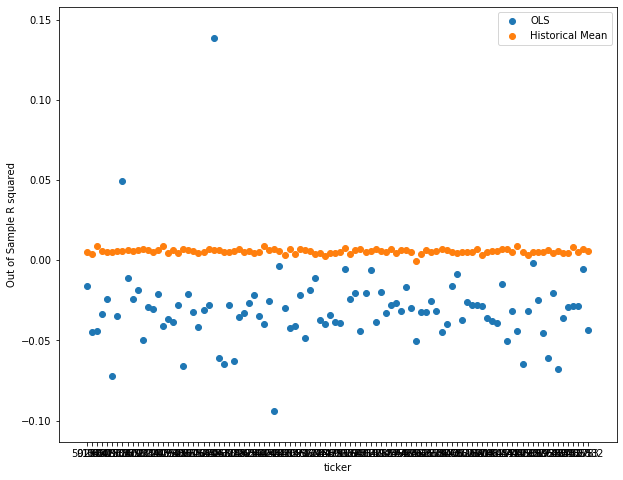

In [67]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tickers,[ols(ticker, 210)[2] for ticker in tickers], label = "OLS")
ax.scatter(tickers,[hm(ticker, 210)[2] for ticker in tickers], label = "Historical Mean")
ax.set_ylabel('Out of Sample R squared')
ax.set_xlabel('ticker')
ax.legend(loc = 'best')
plt.show()

# Other Model Prediction 问题部分


##  Split the data: Training set and Hold out test set

In [12]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import matplotlib.pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
from tqdm.notebook import tqdm
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import os

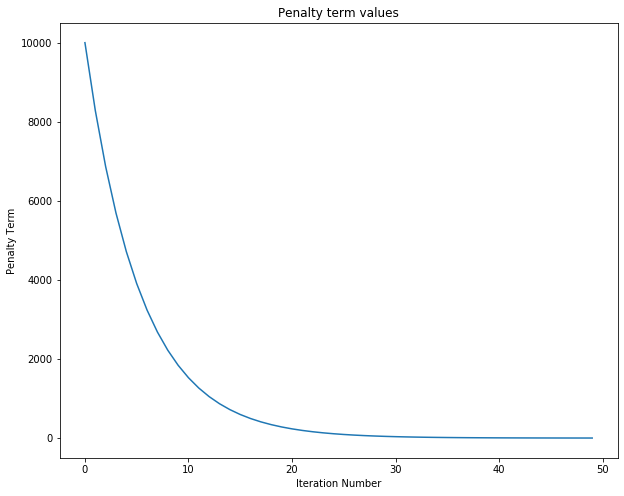

In [14]:
#And the parameter grid over which to optimize
param_grid = [{'lasso__alpha': np.logspace(4, 0, 50)}]

fig, ax = plt.subplots(figsize=(10,8))
x = range(len(param_grid[0]['lasso__alpha']))
ax.plot(x, param_grid[0]['lasso__alpha'], label = 'Training Set')
ax.set_ylabel('Penalty Term')
ax.set_xlabel('Iteration Number')
ax.set_title('Penalty term values')
plt.show()

In [52]:
hold_out_test = merge_data[merge_data['Dates'].dt.year>= t] #我要取一个 rolling window(100) 长度为t 橙色部分为t+1 的切分 
training_set =  merge_data[merge_data['Dates'].dt.year< t]

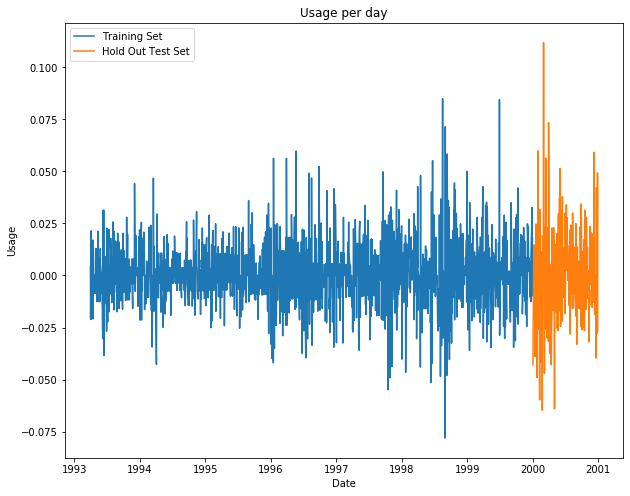

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(training_set['Dates'], training_set['50286'+" return"], label = 'Training Set') 
ax.plot(hold_out_test['Dates'], hold_out_test['50286'+" return"], label ='Hold Out Test Set')
ax.set_ylabel('Usage')
ax.set_xlabel('Date')
ax.set_title('Usage per day')
ax.legend(loc='best')
plt.show()

In [16]:
from sklearn.metrics import r2_score
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)


## Training in Lasso

In [ ]:
def ols(ticker, window):                # 这个是我在OLS当中取window的做法，在这里好像不太行 我就删掉了
    l1ri = df[ticker+" return"].shift(1)
    l2ri = df[ticker+" return"].shift(2)
    l3ri = df[ticker+" return"].shift(3)
    l1fi = df[ticker+" flow"].shift(1)
    l2fi = df[ticker+" flow"].shift(2)
    l3fi = df[ticker+" flow"].shift(3)
    y = df[ticker+" return"]
    data = pd.DataFrame({"Dates":df["Dates"],"y":y,"r1":l1ri,"r2":l2ri,"r3":l3ri,"f1":l1fi,"f2":l2fi,"f3":l3fi}).dropna()
    variables=[x for x in data.columns if 'r' in x or 'f' in x]
    size = len(data)
    pred = []
    se = []
    test = []
    crmse = []
    # Rolling windows
    for i in range(size-window-1):
        train_y = data["y"][i:i+window+1]
        test_y = data["y"][i+window+1:i+window+2].values[0]
        train_X = data[variables][i:i+window+1]
        test_X = data[variables][i+window+1:i+window+2]

In [89]:
#Independant Variables
variables=[x for x in data.columns if 'r' in x or 'f' in x]

#Dependant Variable
outcome_varaiable= df['50286'+" return"]

In [17]:
scores = []           #我只要能切割好数据集 选出一个最佳的Penalty 再带入就行了
for alpha in tqdm(param_grid[0]['lasso__alpha']): 
    cv_scores = []
    for train_index, test_index in tscv.split(training_set):
        
        #Define the training and validation sets
        df_train = training_set.iloc[train_index]
        df_validation = training_set.iloc[test_index]
        X_train, y_train = df_train[variables], df_train[outcome_varaiable]
        X_validation, y_validation = df_validation[variables], df_validation[outcome_varaiable]

        #Rescale the data by the training set
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_validation = scaler.transform(X_validation)
        
        #Traing the model with the penalty term
        model_type = Lasso(alpha =alpha, max_iter = 100000)
        model = model_type.fit(X_train, y_train)    

        #Record the score for that fold
        validation_score = model.score(X_validation,y_validation)
        cv_scores.append(validation_score)
    
    #Average the CV scores and record
    scores.append([alpha, np.average(cv_scores)])

NameError: name 'training_set' is not defined

In [ ]:
sorted_scores = sorted(scores, key=lambda tup: tup[1])
print('Best Penalty Term: '+str(sorted_scores[-1][0])+'\nScore: '+str(sorted_scores[-1][1]))

In [ ]:
logistic_lasso= LogisticRegressionCV(Cs = sorted_scores[-1][1], penalty = 'l1', solver = 'liblinear', )
model = model_type.fit(X_train, y_train) 
validation_score = model.score(X_validation,y_validation)
cv_scores.append(validation_score)

## Training in Random Forest


In [95]:
#conda install python-graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import SVG
from sklearn import tree
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

In [96]:
Tree_Reg = DecisionTreeRegressor(max_depth = 6)
Tree_Reg.fit(training_set[variables], training_set[outcome_varaiable])
hold_out_test['Prediction_tree'] = Tree_Reg.predict(hold_out_test[variables])

KeyError: '50286'

In [ ]:
graph = Source(tree.export_graphviz(Tree_Reg, out_file=None, feature_names=variables))
SVG(graph.pipe(format='svg'))

In [ ]:
# Instantiate model with 100 decision trees
'''
Note that:
- n_estimators (i.e. number of tree)
- max_features (i.e. the number of variables available to the regression trees)
- max_depth (i.e. the max depth of the trees)
Are ALL hyper parameters that you may want to optimize through cross validation
'''
rf = RandomForestRegressor(n_estimators = 100, max_features='auto', 
                           max_depth = 7, random_state = 809, n_jobs = -1)

# Train the model on training data
rf.fit(training_set[variables], training_set[outcome_varaiable])

#Predict on the hold out set
hold_out_test['Prediction_RF'] = rf.predict(hold_out_test[variables])

In [ ]:
fig, (ax) = plt.subplots(nrows = 1, figsize=(10,8), sharex=True)
ax.plot(hold_out_test['Date'], hold_out_test['AEP_MW'], label = 'Actual')
ax.plot(hold_out_test['Date'], hold_out_test['Prediction_RF'], label = 'Prediction')
ax.plot(hold_out_test['Date'], hold_out_test['Mean_Pred'], label = 'Mean Prediction')
ax.set_title('MW Usage per day')
ax.legend(loc='best')
ax.set_ylabel('MW Usage')
plt.show()